# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio
## Fonte dos dados
Para este projeto foi utilizado o arquivo de dados `previsao_de_renda.csv` , que contém informações detalhadas sobre clientes de uma instituição financeira.



## Objetivo do projeto
O objetivo deste projeto é analisar o conjunto de dados fornecido para extrair insights valiosos sobre os clientes da instituição e obter um modelo de previsão de renda para esses clientes. A análise inclui uma comparação entre as variavéis do dataframe como tempo de emprego, tipo de renda e outras métricas relevantes, alem da criação de um modelo para a previsão utilizando essas variáveis. A meta é identificar padrões e tendências que possam ser úteis para a empresa e tembém a ajude a maximizar seus resultados.

## Ferramentas Utilizadas

## Etapa 2 Crisp-DM: Entendimento dos dados


### Dicionário de dados

O conjunto de dados contém as seguintes colunas, com suas respectivas descrições:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência                                 |    Objeto    |
| id_cliente              |  Numero de identificação do cliente                 |    Inteiro   |
| sexo                    |  Sexo do cliente: Masculino(M) ou Feminino(F)       |    Objeto    |
| posse_de_veiculo        |  Se possui ou não algum veículo                     |    Booleano  |
| posse_de_imovel         |  Se possui ou não algum imóvel                      |    Booleano  |
| qtd_filhos              |  Quantidade de filhos do cliente                    |    Inteiro   |
| tipo_renda              |  Como o cliente obtém renda                         |    Objeto    |
| educacao                |  Nível de formação do cliente                       |    Objeto    |
| estado_civil            |  Estado civil do cliente                            |    Objeto    |
| tipo_residencia         |  Local onde o cliente reside                        |    Objeto    |
| idade                   |  Idade do cliente                                   |    Inteiro   |
| tempo_emprego           |  Quantos anos de trabalho tem o cliente             |Ponto flutuante|
| qt_pessoas_residencia   |  Quantidade de pessoas que vivem na residencia do cliente|Ponto flutuante|
| renda                   |  Quanto o cliente ganha de renda mensalmente          |Ponto flutuante|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.<br>
Carregando os pacotes que serão utilizados para a analise:

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
from collections import Counter
%matplotlib inline


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [11]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [12]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

In [13]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [14]:
renda['educacao'].unique()

array(['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], dtype=object)

In [15]:
renda.dtypes
lista_tipo = pd.DataFrame([renda.columns])
lista_tipo.value_counts()
renda.dtypes.value_counts()

object            5
int64             4
float64           3
bool              2
datetime64[ns]    1
Name: count, dtype: int64

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [17]:
#prof = ProfileReport(renda, explorative=True, minimal=True)

In [18]:
#prof.to_file('./output/renda_analisys.html')

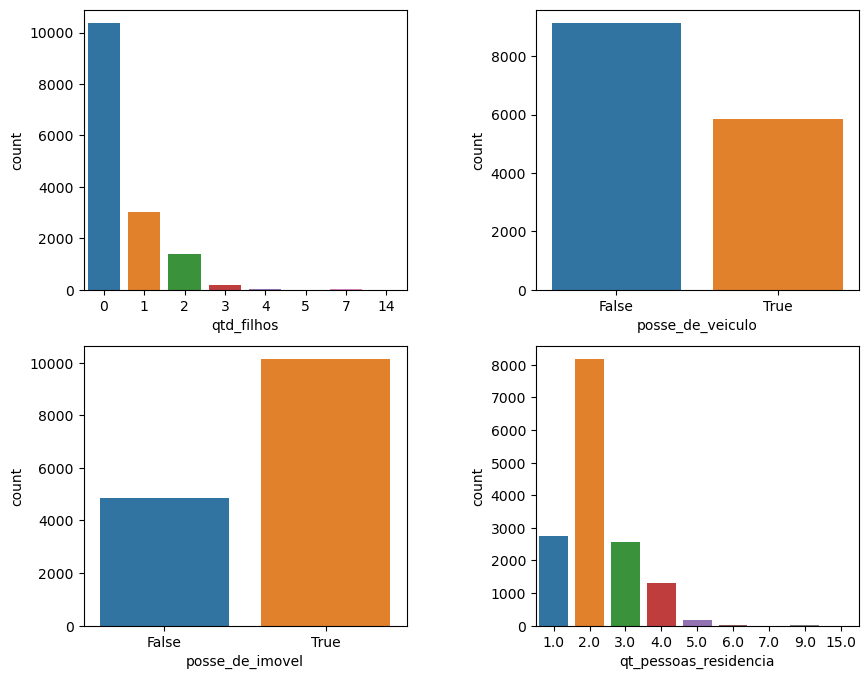

In [19]:
plt.rc('figure', figsize=(10, 8))
fig1, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='qtd_filhos', data=renda)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=renda)
sns.countplot(ax = axes[1, 0], x='posse_de_imovel', data=renda)
sns.countplot(ax = axes[1, 1], x='qt_pessoas_residencia', data=renda)
#axes[1,1].set_xlabel('Estado civil da mãe')

plt.subplots_adjust(wspace=0.4, hspace=0.2)


C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='idade', ylabel='Count'>

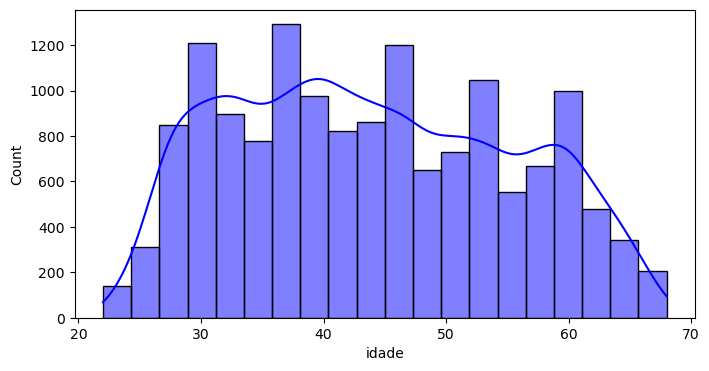

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(renda['idade'], bins=20, kde= True, color='blue')

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

<Figure size 600x300 with 0 Axes>

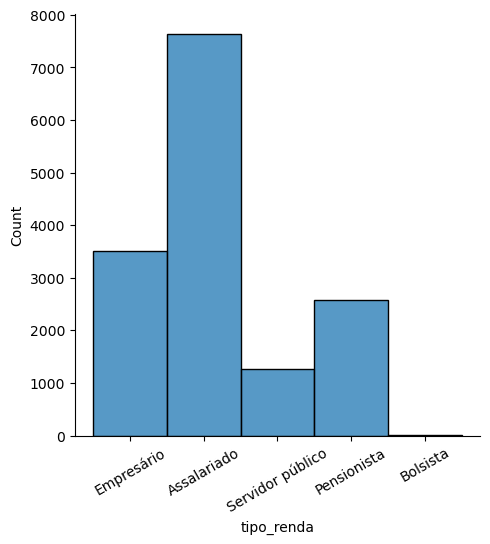

In [21]:
plt.clf()
plt.figure(figsize=(6,3))
sns.displot(renda, x='tipo_renda', bins = 20);
plt.xticks(rotation=30);

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

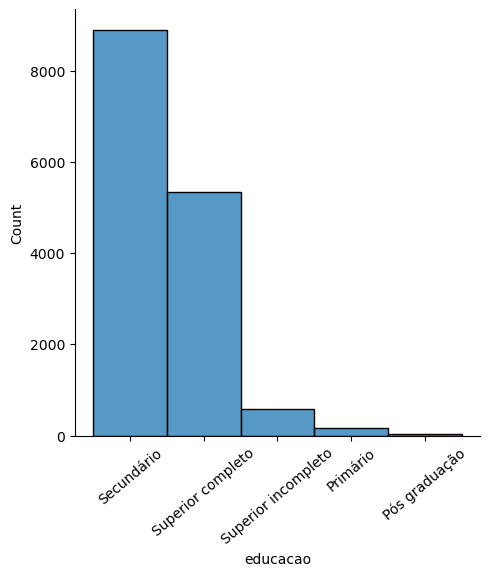

In [22]:
plt.clf()
plt.figure(figsize=(15,3))
sns.displot(renda, x='educacao', bins = 20);
plt.xticks(rotation=40);

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

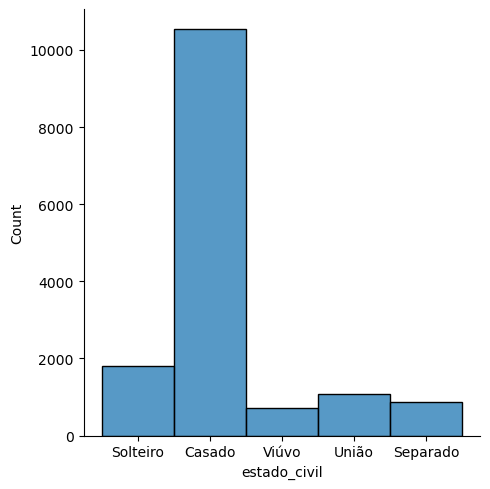

In [23]:
plt.clf()
sns.displot(renda, x='estado_civil', bins = 20);

<Axes: xlabel='renda'>

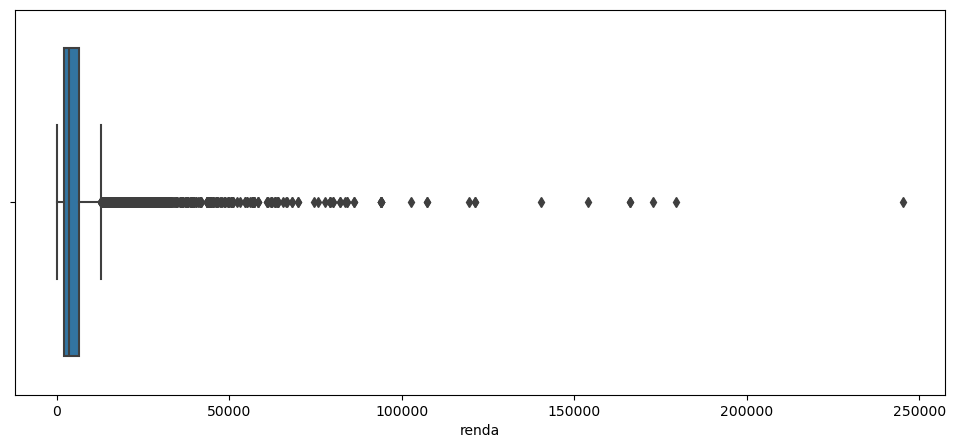

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='renda' , data = renda)

In [25]:
print(renda['renda'].min())
print(renda['renda'].max())
print(renda['renda'].mean())
print(renda['renda'].median())

118.71
245141.67
5697.287056666667
3499.72


<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




In [28]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

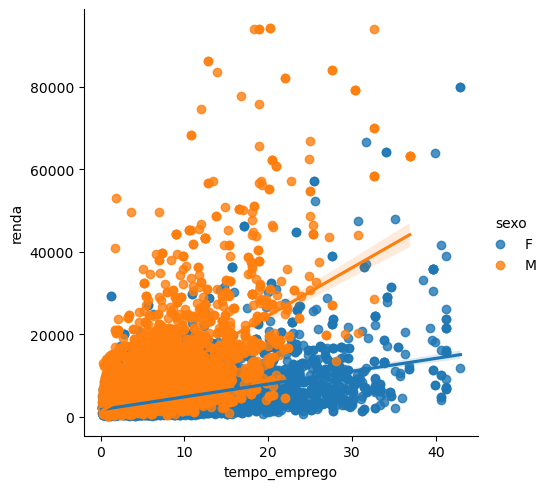

In [29]:
dados_filtrados = renda.query("tempo_emprego >= 0 and renda <= 100000")
sns.lmplot(data=dados_filtrados,y='renda', x='tempo_emprego', hue= 'sexo')

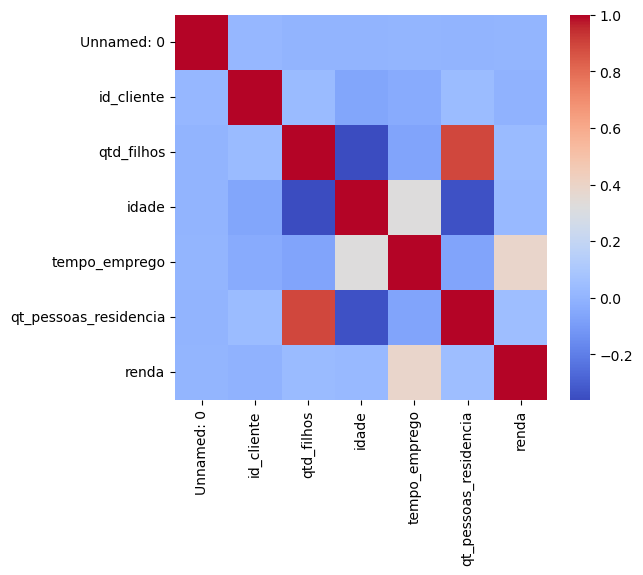

In [30]:
#renda_corr = renda.drop(columns='data_ref')
plt.figure(figsize=(6,5))
renda_corr = renda.select_dtypes(include=['number'])
sns.heatmap(renda_corr.corr(), cmap='coolwarm');

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='data_ref', ylabel='renda'>

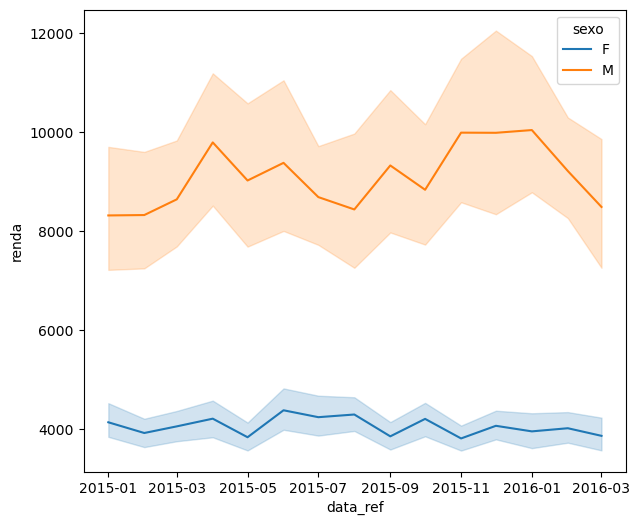

In [31]:
plt.figure(figsize=(7,6))
sns.lineplot(x='data_ref' ,y='renda' , hue='sexo' , data=renda)

<span style="color:red">ESCREVER AQUI</span>


In [33]:
renda.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
id_cliente                        int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

In [34]:
renda.dtypes.value_counts()

object            5
int64             4
float64           3
bool              2
datetime64[ns]    1
Name: count, dtype: int64

In [35]:
#verificando linhas duplicadas
print(renda.shape)
renda.drop_duplicates().shape

(15000, 15)


(15000, 15)

In [36]:
missing = renda.isna().sum()
pd.DataFrame(missing)

,0
Unnamed: 0,0
data_ref,0
id_cliente,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0


In [37]:
renda['tempo_emprego'].isna().sum()

2573

In [38]:
#print(renda['tempo_emprego'] == 'NaN')
renda[renda['tempo_emprego'].isnull()]

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11,11,2015-01-01,6881,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,1685.51
12,12,2015-01-01,2448,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,60,NaN,1.0,6343.52
21,21,2015-01-01,698,F,True,True,0,Pensionista,Superior incompleto,Casado,Casa,58,NaN,2.0,1649.37
22,22,2015-01-01,11948,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,61,NaN,1.0,4715.57
23,23,2015-01-01,11184,F,True,True,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,799.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14979,14979,2016-03-01,3578,F,True,True,1,Pensionista,Secundário,Casado,Casa,56,NaN,3.0,4672.65
14984,14984,2016-03-01,5088,F,True,True,0,Pensionista,Secundário,Casado,Casa,55,NaN,2.0,1235.34
14986,14986,2016-03-01,5831,F,False,False,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,2410.18
14991,14991,2016-03-01,1156,M,False,True,0,Pensionista,Secundário,Casado,Casa,62,NaN,2.0,5153.15


In [39]:
renda.drop(columns=['Unnamed: 0','id_cliente'])

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [42]:
renda.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
id_cliente                        int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

In [43]:
renda.dtypes.value_counts()

object            5
int64             4
float64           3
bool              2
datetime64[ns]    1
Name: count, dtype: int64

In [44]:
#verificando linhas duplicadas
print(renda.shape)
renda.drop_duplicates().shape

(15000, 15)


(15000, 15)

In [45]:
missing = renda.isna().sum()
pd.DataFrame(missing)

,0
Unnamed: 0,0
data_ref,0
id_cliente,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0


In [46]:
renda['tempo_emprego'].isna().sum()

2573

In [47]:
#print(renda['tempo_emprego'] == 'NaN')
renda[renda['tempo_emprego'].isnull()]

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11,11,2015-01-01,6881,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,1685.51
12,12,2015-01-01,2448,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,60,NaN,1.0,6343.52
21,21,2015-01-01,698,F,True,True,0,Pensionista,Superior incompleto,Casado,Casa,58,NaN,2.0,1649.37
22,22,2015-01-01,11948,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,61,NaN,1.0,4715.57
23,23,2015-01-01,11184,F,True,True,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,799.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14979,14979,2016-03-01,3578,F,True,True,1,Pensionista,Secundário,Casado,Casa,56,NaN,3.0,4672.65
14984,14984,2016-03-01,5088,F,True,True,0,Pensionista,Secundário,Casado,Casa,55,NaN,2.0,1235.34
14986,14986,2016-03-01,5831,F,False,False,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,2410.18
14991,14991,2016-03-01,1156,M,False,True,0,Pensionista,Secundário,Casado,Casa,62,NaN,2.0,5153.15


In [48]:
renda = renda.drop(columns=['Unnamed: 0','id_cliente', 'data_ref'])

In [49]:
renda = renda.dropna(subset=['tempo_emprego'])

In [50]:
renda.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [51]:
renda.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,12427.000000,12427.00000,12427.000000,12427.000000,12427.000000
mean,0.513318,40.67458,7.722635,2.303372,6116.539763
std,0.789056,9.39220,6.711189,0.940542,8890.061601
min,0.000000,22.00000,0.117808,1.000000,118.710000
25%,0.000000,33.00000,2.973973,2.000000,2117.235000
50%,0.000000,40.00000,6.013699,2.000000,3681.050000
75%,1.000000,48.00000,10.120548,3.000000,6846.650000
max,14.000000,67.00000,42.906849,15.000000,245141.670000


In [52]:
#transforma as variaveis categoricas em dummys
colunas_categoricas = renda.select_dtypes(include=['object', 'category']).columns.tolist()
renda_arv = pd.get_dummies(renda, columns=colunas_categoricas, drop_first=True)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
X = renda_arv.drop('renda', axis=1)
y = renda_arv['renda']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

regressao = RandomForestRegressor(max_depth=15,random_state=1998)
regressao.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=1998)

In [60]:
y_pred = regressao.predict(X_test)
y_train_pred = regressao.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'MSE: {mse}')
print(f'R2 score teste: {r2}')
print(f'R2 score treino: {r2_train}')

MSE: 36598664.027345754
R2 score teste: 0.3976524337489079
R2 score treino: 0.7633726763304165


## Etapa 5 Crisp-DM: Avaliação dos resultados


Avaliando o R2, o modelo prevê 52,02 % para a base de teste e 74,66 % para a base de treino

In [115]:
data = {'Preditos': y_pred, 'Reais': y_test}
df_pred = pd.DataFrame(data)
df_pred

,Preditos,Reais
13855,1582.803988,906.26
5656,3694.708484,767.49
5653,6917.385812,12791.46
13513,4237.373330,8696.36
13323,3040.809434,4744.50
...,...,...
9273,9758.137753,13863.35
6696,5570.993845,3265.98
8042,3407.948515,2166.44
1018,4772.145873,5244.78


C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


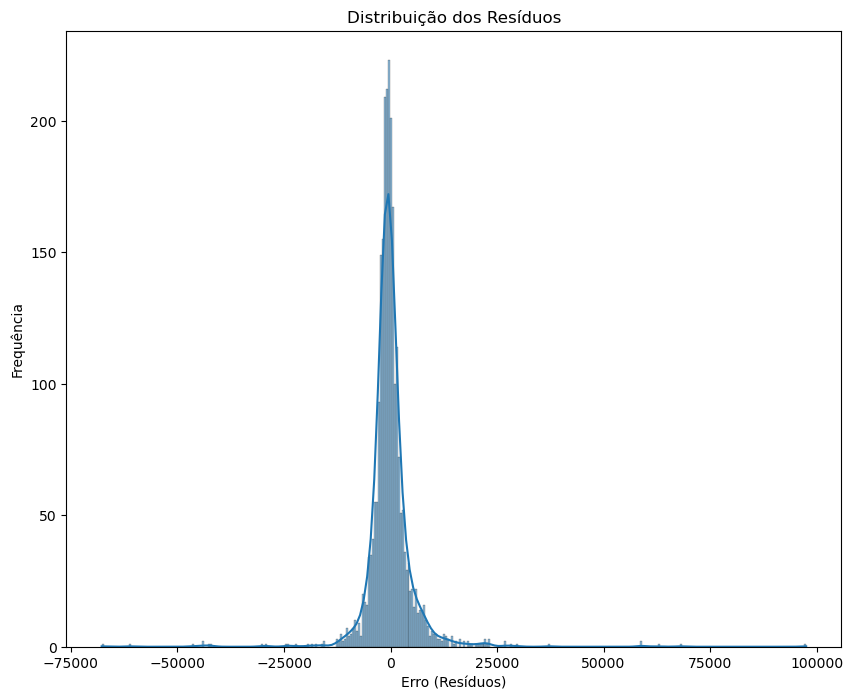

In [117]:
# Calcular os resíduos
residuos = y_test - y_pred

# Plotar a distribuição dos resíduos
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro (Resíduos)')
plt.ylabel('Frequência')
plt.show()

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [121]:
# Funçao para transformar os dados e fazer a previsao
def dummy_transformation(dados):
    # Crie um DataFrame com os dados de entrada
    novos_dados = pd.DataFrame([dados])
    
    colunas_categoricas = renda.select_dtypes(include=['object', 'category']).columns.tolist()
    novos_dados_dummy = pd.get_dummies(novos_dados, columns=colunas_categoricas, drop_first=True)
    
     #coloca as colunas na mesma ordem das colunas do treinamento
    novos_dados_dummy = novos_dados_dummy.reindex(columns=X.columns, fill_value=0)
    
    previsao_renda = regressao.predict(novos_dados_dummy)
    
    return previsao_renda[0]

In [125]:
novos_dados = {
    'sexo': 'M',
    'posse_de_veiculo': True,
    'posse_de_imovel': True,
    'qtd_filhos': 5,
    'tipo_renda': 'Empresário',
    'educacao': 'Secundário',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 32,
    'tempo_emprego': 10,
    'qt_pessoas_residencia': 1.0
}

In [127]:
previsao = dummy_transformation(novos_dados)
print(f'Previsão de renda: R$ {previsao:.2f}')

Previsão de renda: R$ 6855.79
